In [ ]:
pip install tensorflow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # used to convert iage into array
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten,Dense,Dropout,Activation,BatchNormalization
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report




In [ ]:
filepath="/content/drive/MyDrive/skin_cancer_dataset"


In [ ]:
name=os.listdir(filepath)
name

['melanoma', 'notmelanoma']

In [ ]:
filepaths=list(glob.glob(filepath+'/**/*.*'))

In [ ]:
filepaths

['/content/drive/MyDrive/skin_cancer_dataset/melanoma/AMM1_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/LMM4_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM3_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM6_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/SSM10_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM1_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/SSM14_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM4_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM2_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/LMM1_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/NM5_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/SSM13_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/SSM20_orig.jpg',
 '/content/drive/MyDrive/skin_cancer_dataset/melanoma/SSM25_orig.jpg',
 '/content/drive/MyDr

In [ ]:
# Extracting labels from the folder name
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
# cocatinating filepath and labels to make it dataframe
filepath=pd.Series(filepaths,name="Filepath").astype(str)
labels=pd.Series(labels,name="Label")
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/skin_cancer_dataset/mel...,melanoma
1,/content/drive/MyDrive/skin_cancer_dataset/mel...,melanoma
2,/content/drive/MyDrive/skin_cancer_dataset/mel...,melanoma
3,/content/drive/MyDrive/skin_cancer_dataset/not...,notmelanoma
4,/content/drive/MyDrive/skin_cancer_dataset/mel...,melanoma


<Axes: xlabel='Label', ylabel='count'>

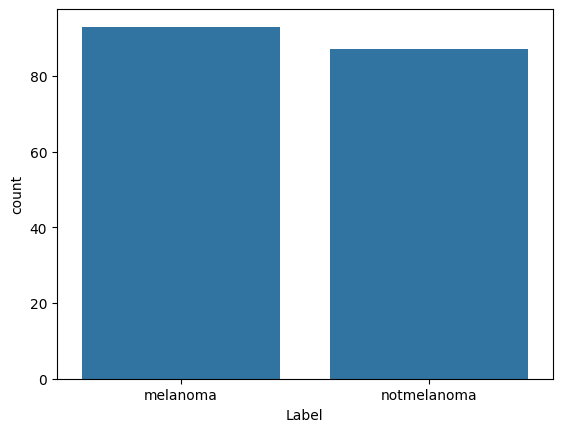

In [ ]:
counts=data.Label.value_counts()  # to check whether our dataset is balance or not
sns.barplot(x=counts.index,y=counts)


In [ ]:
train,test=train_test_split(data,test_size=0.20,random_state=42)

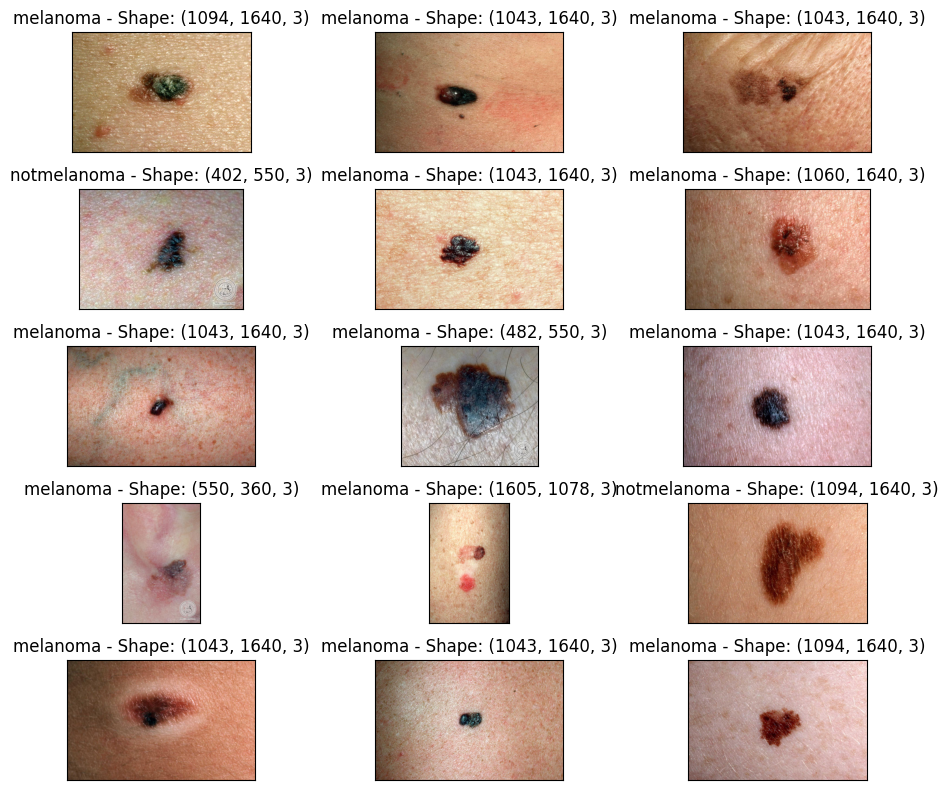

In [ ]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    # Assuming data is a DataFrame containing 'Filepath' and 'Label' columns
    image = plt.imread(data.Filepath[i])
    ax.imshow(image)
    ax.set_title(f"{data.Label[i]} - Shape: {image.shape}")

plt.tight_layout()
plt.show()



In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
# Converting our train,test,valdation data into array

train_gen = train_datagen.flow_from_dataframe(dataframe= train,x_col='Filepath',y_col='Label',target_size=(224,224),
                                              class_mode='categorical',batch_size=32,shuffle=True,seed=42)

valid_gen =train_datagen.flow_from_dataframe(dataframe=test,x_col='Filepath',y_col='Label',target_size=(224,224),
                                            class_mode='categorical',batch_size=32,shuffle=False,seed=42)

test_gen =test_datagen.flow_from_dataframe(dataframe=test,x_col='Filepath',y_col='Label',target_size=(224,224),
                                           class_mode='categorical',batch_size=32,shuffle=False)

Found 144 validated image filenames belonging to 2 classes.
Found 36 validated image filenames belonging to 2 classes.
Found 36 validated image filenames belonging to 2 classes.


In [ ]:
model = models.Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (224, 224, 3),
			kernel_size = (11, 11), strides = (4, 4),
			padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
			strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Softmax Layer
model.add(Dense(2))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_gen, epochs=100, validation_data=valid_gen,callbacks=[early_stopping])

# Evaluate your model on the test set
test_loss, test_accuracy = model.evaluate_generator(test_gen, steps=len(test_gen))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
5/5 [==============================] - 42s 7s/step - loss: 2.2641 - accuracy: 0.6111 - val_loss: 222.2057 - val_accuracy: 0.4722
Epoch 2/100
5/5 [==============================] - 27s 6s/step - loss: 1.2606 - accuracy: 0.6389 - val_loss: 24.3929 - val_accuracy: 0.5556
Epoch 3/100
5/5 [==============================] - 26s 5s/step - loss: 0.8482 - accuracy: 0.6875 - val_loss: 121.1948 - val_accuracy: 0.4722
Epoch 4/100
5/5 [==============================] - 26s 5s/step - loss: 0.7416 - accuracy: 0.7292 - val_loss: 32.1751 - val_accuracy: 0.5556
Epoch 5/100
5/5 [==============================] - 28s 6s/step - loss: 0.4867 - accuracy: 0.7986 - val_loss: 36.5360 - val_accuracy: 0.5278
Epoch 6/100
5/5 [==============================] - 25s 5s/step - loss: 0.5596 - accuracy: 0.8194 - val_loss: 30.7961 - val_accuracy: 0.5833
Epoch 7/100
5/5 [==============================] - 27s 5s/step - loss: 0.4469 - accuracy: 0.8125 - val_loss: 90.6028 - val_accuracy: 0.5278


<ipython-input-39-0657040ac3e8>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_gen, steps=len(test_gen))


Test Loss: 24.392942428588867
Test Accuracy: 0.5555555820465088


In [ ]:
results=model.evaluate(test_gen,verbose=0)
print("Test Loss: ",results[0])
print("test accuracy: ",results[1])

Test Loss:  24.392942428588867
test accuracy:  0.5555555820465088


In [ ]:
# predict the label of test_gen
pred= model.predict(test_gen)
pred=np.argmax(pred,axis=1)

# Map the label
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]



2/2 [==============================] - 2s 141ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    melanoma       0.54      0.41      0.47        17
 notmelanoma       0.57      0.68      0.62        19

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.54        36
weighted avg       0.55      0.56      0.55        36



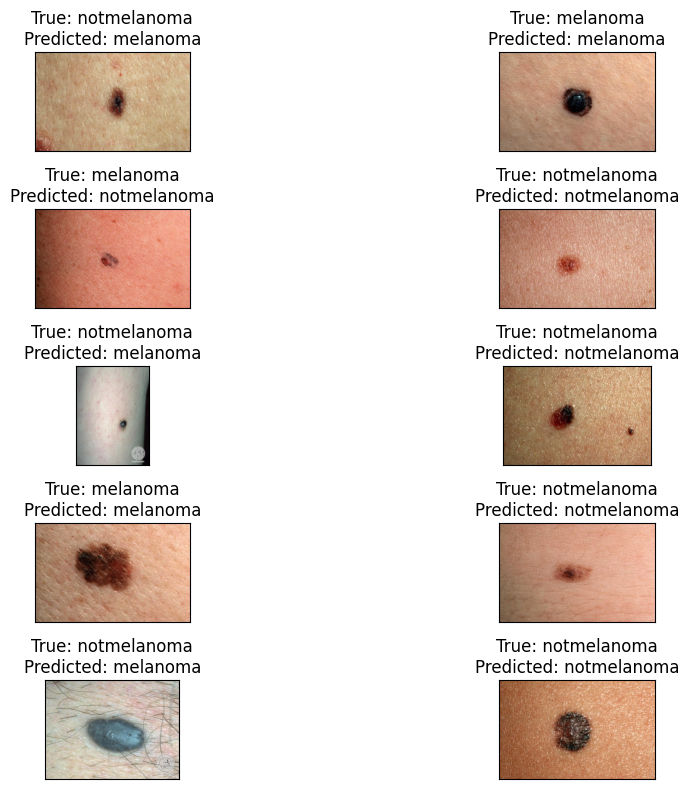

In [ ]:
fig, axes = plt.subplots (nrows=5, ncols=2, figsize=(12, 8),
subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate (axes.flat):
  ax.imshow(plt.imread(test.Filepath.iloc[i]))
  ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# creating my second model resnet50
modelresnet = ResNet50(input_shape=(224,224,3),
                       include_top=False,
                       weights='imagenet',
                       pooling='avg')
modelresnet.trainable=False
inputs=modelresnet.input
x=Dense(128,activation="relu")(modelresnet.output)
x=Dense(128,activation="relu")(x)
outputs=Dense(2,activation="Softmax")(x)
model1=Model(inputs=inputs,outputs=outputs)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model1.fit(train_gen, epochs=100, validation_data=valid_gen,callbacks=[early_stopping])

# Evaluate your model on the test set
test_loss, test_accuracy = model1.evaluate_generator(test_gen, steps=len(test_gen))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
5/5 [==============================] - 80s 14s/step - loss: 0.8051 - accuracy: 0.5764 - val_loss: 1.0028 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.6359 - accuracy: 0.6806 - val_loss: 0.4922 - val_accuracy: 0.7222
Epoch 3/100
5/5 [==============================] - 2s 480ms/step - loss: 0.4247 - accuracy: 0.7917 - val_loss: 0.4639 - val_accuracy: 0.8056
Epoch 4/100
5/5 [==============================] - 2s 496ms/step - loss: 0.3333 - accuracy: 0.8750 - val_loss: 0.4844 - val_accuracy: 0.7222
Epoch 5/100
5/5 [==============================] - 2s 490ms/step - loss: 0.2719 - accuracy: 0.8958 - val_loss: 0.4361 - val_accuracy: 0.7778
Epoch 6/100
5/5 [==============================] - 3s 580ms/step - loss: 0.2188 - accuracy: 0.9028 - val_loss: 0.4290 - val_accuracy: 0.7500
Epoch 7/100
5/5 [==============================] - 2s 467ms/step - loss: 0.1711 - accuracy: 0.9444 - val_loss: 0.3967 - val_accuracy: 0.7500
Epoch 8/100
5/5 [

<ipython-input-15-b37a68f2f01c>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model1.evaluate_generator(test_gen, steps=len(test_gen))


Test Loss: 0.396651029586792
Test Accuracy: 0.75


In [ ]:
# predict the label of test_gen
pred= model1.predict(test_gen)
pred=np.argmax(pred,axis=1)

# Map the label
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]



2/2 [==============================] - 1s 126ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    melanoma       0.74      0.78      0.76        18
 notmelanoma       0.76      0.72      0.74        18

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



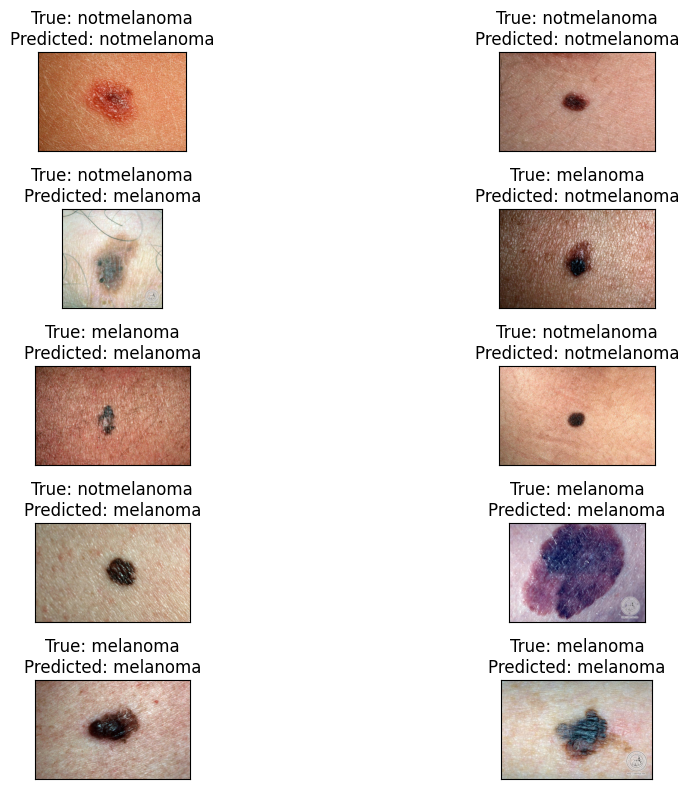

In [ ]:
fig, axes = plt.subplots (nrows=5, ncols=2, figsize=(12, 8),
subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate (axes.flat):
  ax.imshow(plt.imread(test.Filepath.iloc[i]))
  ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()